In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/analyzing-credit-card-spending-habits-in-india/Credit card transactions - India - Simple.csv


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Importing the dataset
data=pd.read_csv("/kaggle/input/analyzing-credit-card-spending-habits-in-india/Credit card transactions - India - Simple.csv")
data

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
...,...,...,...,...,...,...,...
26047,26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191
26048,26048,"Pune, India",3-Aug-14,Signature,Travel,M,246316
26049,26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019
26050,26050,"Kanpur, India",14-Sep-14,Silver,Travel,M,88174


# **Checking the dataset**

In [20]:
# Check the size of the dataset
data.shape


(26052, 7)

This dataset has 26052 Rows and 7 Columns

In [21]:
# Get top 5 rows
data.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


Column Names are:
* index - index
* City - The city in which the transaction took place
* Date - The date of the transaction
* Card Type - The type of credit card used for the transaction (Gold, Platinum, Silver, Signature)
* Exp Type - The type of expense associated with the transaction (Bills, Food, Entertainment, Grocery, Fuel, Travel)
* Gender - The gender of the cardholder (Male, Female)
* Amount - The amount of the transaction

In [24]:
# Check for null values
data.isnull().sum()

index        0
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

There is no null values


In [25]:
# Checking for duplicate
data.duplicated().sum()

0

There is no duplicates


# **Data Formatting to extract day, month, year and city**

In [29]:
# Splitting date into Day, Month, Year
data[['Day','Month','Year']] =data['Date'].str.split("-", expand=True)
data

,index,City,Date,Card Type,Exp Type,Gender,Amount,Day,Month,Year
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475,29,Oct,14
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555,22,Aug,14
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738,27,Aug,14
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424,12,Apr,14
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574,5,May,15
...,...,...,...,...,...,...,...,...,...,...
26047,26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191,22,Jun,14
26048,26048,"Pune, India",3-Aug-14,Signature,Travel,M,246316,3,Aug,14
26049,26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019,16,Jan,15
26050,26050,"Kanpur, India",14-Sep-14,Silver,Travel,M,88174,14,Sep,14


In [39]:
# Spliting City into City and Country and taking only City
data["City"]=data["City"].str.split(",",expand=True)[0]

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
 7   Day        26052 non-null  object
 8   Month      26052 non-null  object
 9   Year       26052 non-null  object
 10  City1      26052 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.2+ MB


In [41]:
data

,index,City,Date,Card Type,Exp Type,Gender,Amount,Day,Month,Year,City1
0,0,Delhi,29-Oct-14,Gold,Bills,F,82475,29,Oct,14,Delhi
1,1,Greater Mumbai,22-Aug-14,Platinum,Bills,F,32555,22,Aug,14,Greater Mumbai
2,2,Bengaluru,27-Aug-14,Silver,Bills,F,101738,27,Aug,14,Bengaluru
3,3,Greater Mumbai,12-Apr-14,Signature,Bills,F,123424,12,Apr,14,Greater Mumbai
4,4,Bengaluru,5-May-15,Gold,Bills,F,171574,5,May,15,Bengaluru
...,...,...,...,...,...,...,...,...,...,...,...
26047,26047,Kolkata,22-Jun-14,Silver,Travel,F,128191,22,Jun,14,Kolkata
26048,26048,Pune,3-Aug-14,Signature,Travel,M,246316,3,Aug,14,Pune
26049,26049,Hyderabad,16-Jan-15,Silver,Travel,M,265019,16,Jan,15,Hyderabad
26050,26050,Kanpur,14-Sep-14,Silver,Travel,M,88174,14,Sep,14,Kanpur


In [43]:
# Dropping city1 which was a mistake
data.drop(columns=["City1"],inplace=True)

In [44]:
data

,index,City,Date,Card Type,Exp Type,Gender,Amount,Day,Month,Year
0,0,Delhi,29-Oct-14,Gold,Bills,F,82475,29,Oct,14
1,1,Greater Mumbai,22-Aug-14,Platinum,Bills,F,32555,22,Aug,14
2,2,Bengaluru,27-Aug-14,Silver,Bills,F,101738,27,Aug,14
3,3,Greater Mumbai,12-Apr-14,Signature,Bills,F,123424,12,Apr,14
4,4,Bengaluru,5-May-15,Gold,Bills,F,171574,5,May,15
...,...,...,...,...,...,...,...,...,...,...
26047,26047,Kolkata,22-Jun-14,Silver,Travel,F,128191,22,Jun,14
26048,26048,Pune,3-Aug-14,Signature,Travel,M,246316,3,Aug,14
26049,26049,Hyderabad,16-Jan-15,Silver,Travel,M,265019,16,Jan,15
26050,26050,Kanpur,14-Sep-14,Silver,Travel,M,88174,14,Sep,14


# **EDA**

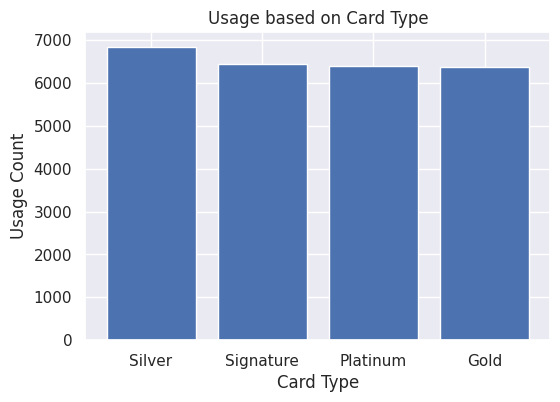

In [51]:
# Checking the usage based on card type 
cardTypeCount = data['Card Type'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(cardTypeCount.index, cardTypeCount.values)
plt.xlabel('Card Type')
plt.ylabel('Usage Count')
plt.title('Usage based on Card Type')
plt.show()

It can be seen that the silver card has the most usage


Gender
F    2205311030
M    1869522343
Name: Amount, dtype: int64


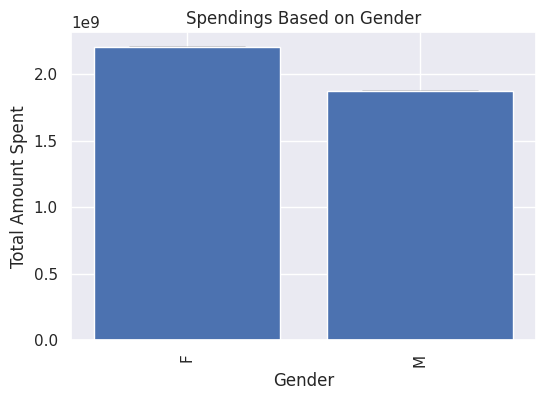

In [53]:
groupedByGender = data.groupby('Gender')['Amount'].sum()
print(groupedByGender)
plt.figure(figsize=(6, 4))
groupedByGender.plot(kind='bar', edgecolor='k')
plt.bar(groupedByGender.index, groupedByGender)
plt.xlabel('Gender')
plt.ylabel('Total Amount Spent')
plt.title('Spendings Based on Gender')
plt.grid(True)
plt.show()

We can see females spending more amount than males.


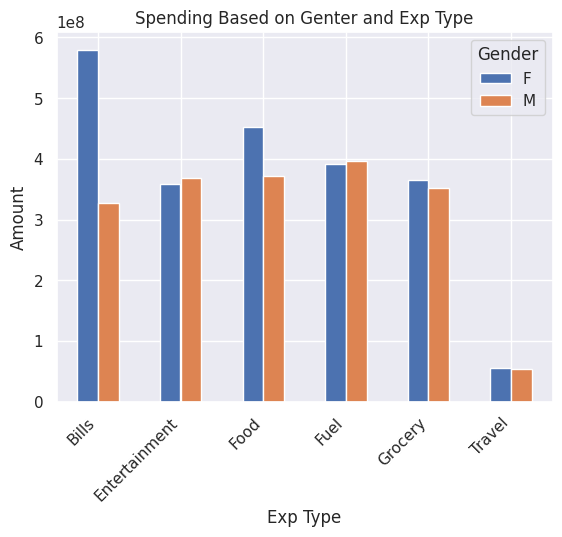

<Figure size 640x480 with 0 Axes>

In [70]:
# Checking the spending based on gender and Exp Type
groupedData = data.groupby(['Exp Type', 'Gender'])['Amount'].sum().unstack()
groupedData.plot(kind='bar', stacked=False)
plt.xlabel('Exp Type')
plt.ylabel('Amount')
plt.title('Spending Based on Genter and Exp Type')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.savefig('Spending_by_gender_exp_type.png')


We can see more number of transactons in bills are the highst followed by food made by female customers.
Expences for fuel is high in male customers.


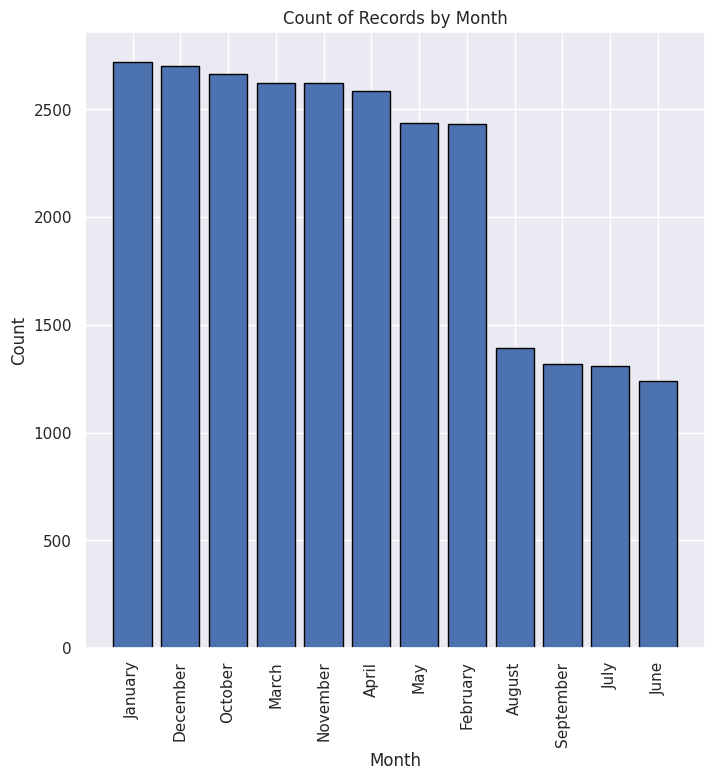

<Figure size 640x480 with 0 Axes>

In [71]:
# Chekcking the spending based on months
monthCounts = data["Month"].value_counts()
plt.figure(figsize=(8, 8))
plt.bar(monthCounts.index, monthCounts.values, edgecolor="black")
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Count of Records by Month")
plt.xticks(rotation=90)
plt.show()
plt.savefig('Spending_by_month.png')

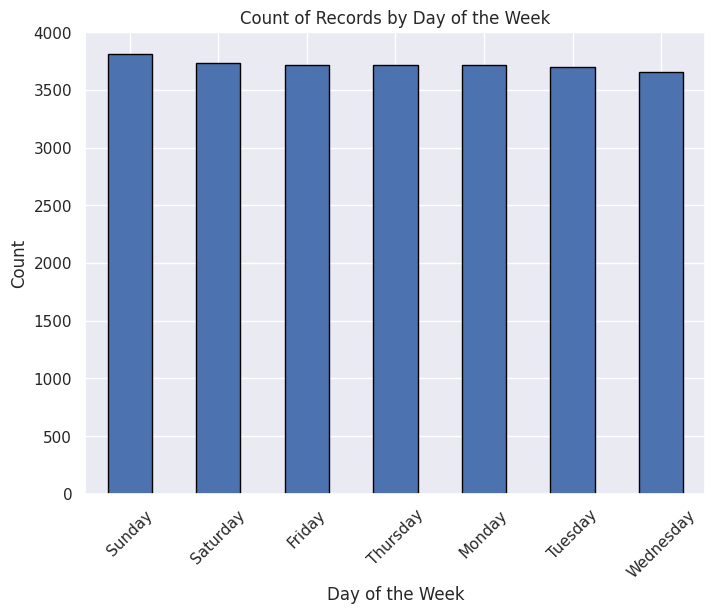

In [74]:
# Assign Day names to dates using Pandas lib
data["Date"] = pd.to_datetime(data["Date"])
data["Month"] = data["Date"].dt.month_name()
data["Day"] = data["Date"].dt.day_name()
data["Weekday"] = data["Date"].dt.weekday

plt.figure(figsize=(8, 6))
data["Day"].value_counts().plot(kind='bar', edgecolor="black")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.title("Count of Records by Day of the Week")
plt.xticks(rotation=45)
plt.show()
